In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
data = pd.read_csv("superstore_dataset2011-2015.csv", encoding="ISO-8859-1")
df = pd.DataFrame(data)


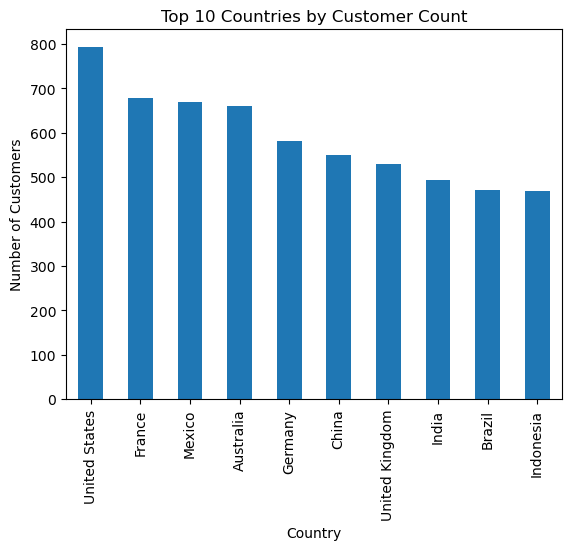

In [18]:
filtered_data = df[['Country', 'Customer ID']].drop_duplicates()
top_countries = filtered_data['Country'].value_counts().nlargest(10)

top_countries.plot(kind='bar', xlabel='Country', ylabel='Number of Customers', title='Top 10 Countries by Customer Count')
plt.show()


In [19]:
us_data=data[data.Country=='United States']


In [20]:
df['InvoiceNo'] = df.groupby('Customer ID')['Order ID'].transform('count')

In [39]:

us_data = us_data[(us_data['Quantity'] > 0)]

us_data['Order Date'] = pd.to_datetime(us_data['Order Date'], errors='coerce')
print(us_data.head())

PRESENT = dt.datetime(2024, 3, 8)

rfm = us_data.groupby('Customer ID').agg({
    'Order Date': lambda date: (PRESENT - date.max()).days,
    'InvoiceNo': 'count',
    'Sales': 'sum'
})


   Row ID         Order ID Order Date Ship Date       Ship Mode Customer ID  \
0   42433     AG-2011-2040 2011-01-01  6/1/2011  Standard Class    TB-11280   
1   22253    IN-2011-47883 2011-01-01  8/1/2011  Standard Class    JH-15985   
2   48883     HU-2011-1220 2011-01-01  5/1/2011    Second Class      AT-735   
3   11731  IT-2011-3647632 2011-01-01  5/1/2011    Second Class    EM-14140   
4   22255    IN-2011-47883 2011-01-01  8/1/2011  Standard Class    JH-15985   

     Customer Name      Segment         City            State  ...  \
0  Toby Braunhardt     Consumer  Constantine      Constantine  ...   
1      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   
2    Annie Thurman     Consumer     Budapest         Budapest  ...   
3     Eugene Moren  Home Office    Stockholm        Stockholm  ...   
4      Joseph Holt     Consumer  Wagga Wagga  New South Wales  ...   

          Category  Sub-Category                 Product Name    Sales  \
0  Office Supplies       Stora

In [40]:
rfm.columns = ['recency', 'frequency', 'monetary']

rfm['recency'] = rfm['recency'].fillna(0).astype(int)

rfm['r quartile'] = pd.qcut(rfm['recency'], 4, ['1', '2', '3', '4'])
rfm['f quartile'] = pd.qcut(rfm['frequency'], 4, ['4', '3', '2', '1'])
rfm['m quartile'] = pd.qcut(rfm['monetary'], 4, ['4', '3', '2', '1'])
rfm['RFM Score'] = rfm['r quartile'].astype(str) + rfm['f quartile'].astype(str) + rfm['m quartile'].astype(str)
print(rfm.head())


             recency  frequency     monetary r quartile f quartile m quartile  \
Customer ID                                                                     
AA-10315        3538         42  13747.41300          3          2          1   
AA-10375        3374         42   5884.19500          1          2          3   
AA-10480        3472         38  17695.58978          3          2          1   
AA-10645        3381         73  15343.89070          1          1          1   
AA-315          3594          8   2243.25600          3          4          3   

            RFM Score  
Customer ID            
AA-10315          321  
AA-10375          123  
AA-10480          321  
AA-10645          111  
AA-315            343  


In [41]:
top_customers = rfm[rfm['RFM Score'] == '111']

print(top_customers.head())

             recency  frequency     monetary r quartile f quartile m quartile  \
Customer ID                                                                     
AA-10645        3381         73  15343.89070          1          1          1   
AB-10015        3384         77  20037.49750          1          1          1   
AB-10060        3380         57  18416.55040          1          1          1   
AG-10330        3379         67  14534.50618          1          1          1   
AH-10210        3377         66  20365.74018          1          1          1   

            RFM Score  
Customer ID            
AA-10645          111  
AB-10015          111  
AB-10060          111  
AG-10330          111  
AH-10210          111  
